<a href="https://colab.research.google.com/github/r0mer0/Mestrado/blob/main/Exercicio5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import sys
sys.path.append("..")
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import cv2  # for image processing
from sklearn.model_selection import train_test_split
import scipy.io
import os
import tarfile

1.15.2
2.3.1


In [12]:
IMG_SIZE = 299
s = K.get_session()

In [6]:
def read_raw_from_tar(tar_fn, fn):
    with tarfile.open(tar_fn) as f:
        m = f.getmember(fn)
        return f.extractfile(m).read()

def prepare_raw_bytes_for_model(raw_bytes, normalize_for_model=True):
    img = decode_image_from_raw_bytes(raw_bytes)  # decode image raw bytes to matrix
    img = image_center_crop(img)  # take squared center crop
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # resize for our model
    if normalize_for_model:
        img = img.astype("float32")  # prepare for normalization
        img = keras.applications.inception_v3.preprocess_input(img)  # normalize for model
    return img

def decode_image_from_raw_bytes(raw_bytes):
    img = cv2.imdecode(np.asarray(bytearray(raw_bytes), dtype=np.uint8), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def image_center_crop(img):
    h, w, c = img.shape
    h_init=int((h-min(h,w))/2)
    w_init=int((w-min(h,w))/2)
    cropped_img = img[h_init:h_init+min(h, w),w_init:min(h,w)+w_init,:]
    
    # checks for errors
    assert cropped_img.shape == (min(h, w), min(h, w), c), "error in image_center_crop!"
    
    return cropped_img



(397, 600, 3)


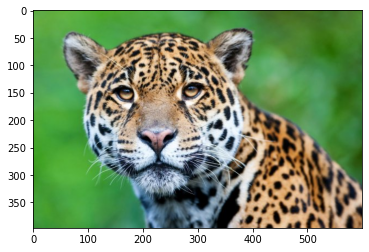

(299, 299, 3)


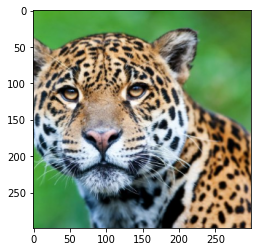

In [13]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/jaguar.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
print(img.shape)
plt.imshow(img)
plt.show()

img = prepare_raw_bytes_for_model(raw_bytes, normalize_for_model=False)
print(img.shape)
plt.imshow(img)
plt.show()

In [14]:
 model = keras.applications.InceptionV3(include_top=True, input_shape=(299, 299, 3), weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


96116736/96112376 [==============================] - 2s 0us/step


In [20]:
from keras.applications.inception_v3 import decode_predictions

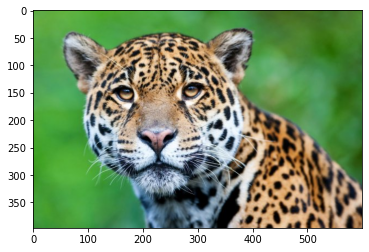

Predicted: jaguar  Score: 86.87 %
Predicted: leopard  Score: 1.15 %
Predicted: tiger_cat  Score: 0.15 %


In [62]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/jaguar.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

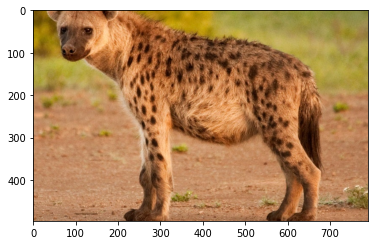

Predicted: hyena  Score: 88.27 %
Predicted: African_hunting_dog  Score: 2.97 %
Predicted: cheetah  Score: 0.39 %


In [63]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/hyena.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

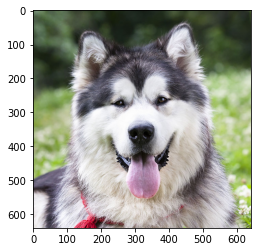

Predicted: malamute  Score: 80.1 %
Predicted: Eskimo_dog  Score: 2.78 %
Predicted: Siberian_husky  Score: 0.43 %


In [64]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/malamute-alasca-p.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

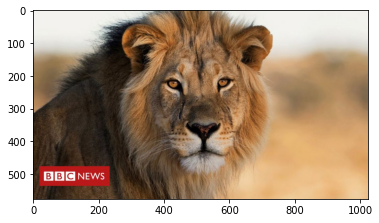

Predicted: lion  Score: 95.46 %
Predicted: cheetah  Score: 0.19 %
Predicted: leopard  Score: 0.11 %


In [67]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/leao.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

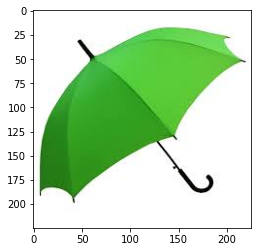

Predicted: umbrella  Score: 99.97 %
Predicted: mountain_tent  Score: 0.01 %
Predicted: parachute  Score: 0.0 %


In [68]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/download.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

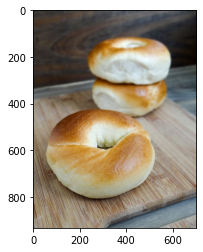

Predicted: bagel  Score: 98.81 %
Predicted: guillotine  Score: 0.55 %
Predicted: pretzel  Score: 0.04 %


In [69]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/Bagels.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

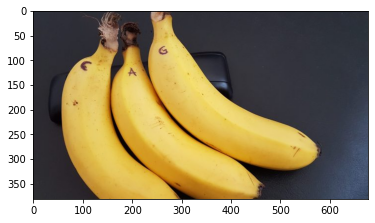

Predicted: banana  Score: 99.93 %
Predicted: orange  Score: 0.0 %
Predicted: spaghetti_squash  Score: 0.0 %


In [70]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/banana.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

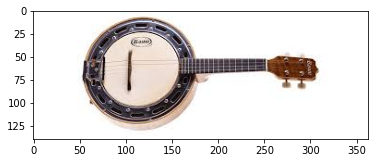

Predicted: banjo  Score: 99.45 %
Predicted: acoustic_guitar  Score: 0.02 %
Predicted: electric_guitar  Score: 0.01 %


In [71]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/banjo.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

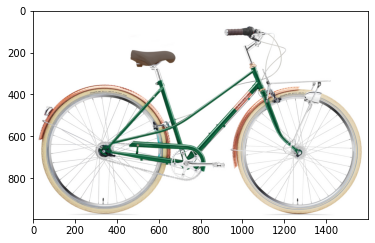

Predicted: mountain_bike  Score: 20.58 %
Predicted: bicycle-built-for-two  Score: 15.22 %
Predicted: disk_brake  Score: 2.75 %


In [72]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/bicycle.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

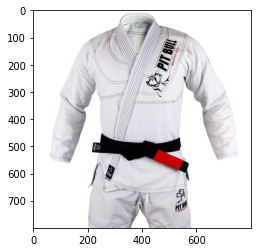

Predicted: jersey  Score: 10.76 %
Predicted: seat_belt  Score: 5.63 %
Predicted: sweatshirt  Score: 4.52 %


In [73]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/kimono.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

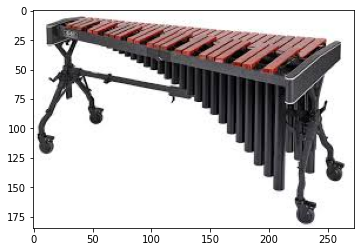

Predicted: marimba  Score: 96.07 %
Predicted: chime  Score: 0.18 %
Predicted: panpipe  Score: 0.15 %


In [74]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/marimba.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

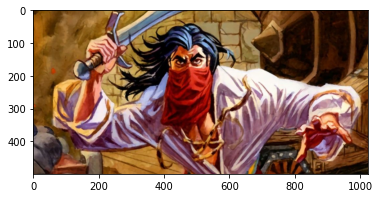

Predicted: comic_book  Score: 91.72 %
Predicted: book_jacket  Score: 3.37 %
Predicted: altar  Score: 0.26 %


In [75]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/pirate.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

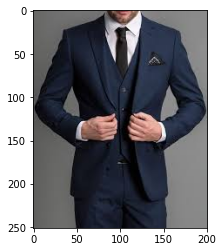

Predicted: suit  Score: 58.61 %
Predicted: Windsor_tie  Score: 17.09 %
Predicted: bow_tie  Score: 2.39 %


In [76]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/suit.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

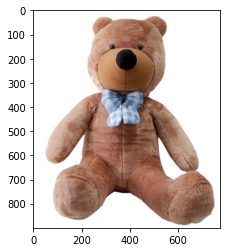

Predicted: teddy  Score: 99.97 %
Predicted: briard  Score: 0.01 %
Predicted: Gila_monster  Score: 0.0 %


In [77]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/teddy.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

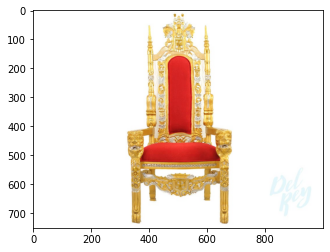

Predicted: throne  Score: 96.75 %
Predicted: barber_chair  Score: 0.58 %
Predicted: barbershop  Score: 0.05 %


In [78]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/throne.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

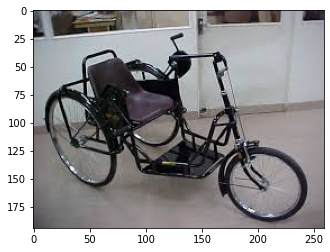

Predicted: tricycle  Score: 73.03 %
Predicted: rocking_chair  Score: 2.48 %
Predicted: bicycle-built-for-two  Score: 1.19 %


In [79]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/tricycle.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

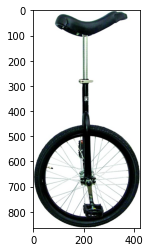

Predicted: unicycle  Score: 99.31 %
Predicted: groenendael  Score: 0.04 %
Predicted: binder  Score: 0.02 %


In [80]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/unicycle.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

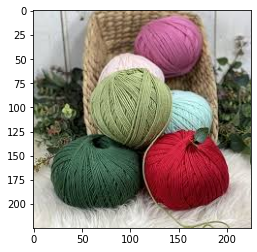

Predicted: wool  Score: 97.09 %
Predicted: crate  Score: 0.21 %
Predicted: grocery_store  Score: 0.1 %


In [81]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/wool.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

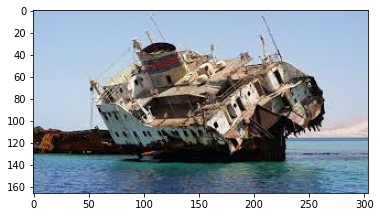

Predicted: wreck  Score: 98.2 %
Predicted: dock  Score: 0.07 %
Predicted: liner  Score: 0.05 %


In [82]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/wreck.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")

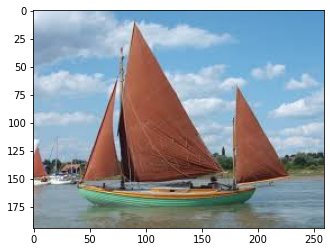

Predicted: yawl  Score: 98.23 %
Predicted: Norwegian_elkhound  Score: 0.03 %
Predicted: cockroach  Score: 0.03 %


In [83]:
raw_bytes = read_raw_from_tar("/content/samples.tar.gz", "samples/yawl.jpg")
img = decode_image_from_raw_bytes(raw_bytes)
plt.imshow(img)
plt.show()

img_model = prepare_raw_bytes_for_model(raw_bytes)
preds=model.predict(np.expand_dims(img_model,axis=0))
decode_preds=decode_predictions(preds,top=3)
name=decode_preds[0][0][1]
score=np.around(decode_preds[0][0][2]*100,decimals=2)
print('Predicted:', name,' Score:', score,"%")
name=decode_preds[0][1][1]
score=np.around(decode_preds[0][1][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")
name=decode_preds[0][2][1]
score=np.around(decode_preds[0][2][2]*100,decimals=2)
print('Predicted:', name, ' Score:', score,"%")